<a href="https://colab.research.google.com/github/caryjim/Python_Exercise/blob/master/NLP_on_Jane_Austen's_%22Emma%22_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Conduct emotion analysis with **NRC (National Research Council Canada)** Emotion Lexicon on **Jane Austen's "Emma"**.



1. Load the sentences of Jane Austen's "Emma" as lists from NLTK **Gutenburg** corpus and treat each sentence as a line. 


Method One: Using Spacy

In [9]:
import spacy
nlp = spacy.load('en')

emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
emma_sentences = nltk.sent_tokenize(emma)

def tokenize(sentence):
    doc = nlp.tokenizer(sentence)
    return [token.lower_ for token in doc if not token.is_punct]

textlist = tokenize(emma)
textlist[:20]


['emma',
 'by',
 'jane',
 'austen',
 '1816',
 '\n\n',
 'volume',
 'i',
 '\n\n',
 'chapter',
 'i',
 '\n\n\n',
 'emma',
 'woodhouse',
 'handsome',
 'clever',
 'and',
 'rich',
 'with',
 'a']

Method Two: Using NLTK gives a different result 

In [1]:
import nltk
nltk.download('gutenberg')
nltk.download('punkt')
from nltk.corpus import gutenberg

emma = gutenberg.sents('austen-emma.txt')
emma[:20]

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.'],
 ['Her',
  'mother',
  'h

2. Make a Pandas Dataframe `df` with two columns. Colume 1 is the line number and column 2 as word. Then, convert all the words in lower cases and get rid of all punctuations. 

In [7]:
import pandas as pd

df = pd.DataFrame(textlist)

df.columns = ['word']
df.head(10)

,word
0,emma
1,by
2,jane
3,austen
4,1816
5,\n\n
6,volume
7,i
8,\n\n
9,chapter


3. Load the data from the NRC Emotion Lexicon http://sentiment.nrc.ca/lexicons-for-research/ into a Pandas Dataframe `nrc`. Index the words and set up the matrix with emotions as column names. Fill in the values correspondingly and print the first 5 rows of `nrc`.


In [8]:
#This code source the NRC text list from git user. Check the link before for non-commerical use information. 
!wget https://raw.githubusercontent.com/wshuyi/info-5731-public/master/NRC_emotion_lexicon_list.txt
nrc = pd.read_csv("NRC_emotion_lexicon_list.txt", sep='\t', header=None)
nrc.columns = ['word', 'emotion', 'value']
nrc = nrc.pivot(index='word',columns='emotion',values='value')
nrc.head()

--2020-06-25 22:38:17--  https://raw.githubusercontent.com/wshuyi/info-5731-public/master/NRC_emotion_lexicon_list.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2579144 (2.5M) [text/plain]
Saving to: ‘NRC_emotion_lexicon_list.txt’

NRC_emotion_lexicon 100%[===================>]   2.46M  --.-KB/s    in 0.1s    

2020-06-25 22:38:18 (17.3 MB/s) - ‘NRC_emotion_lexicon_list.txt’ saved [2579144/2579144]



emotion,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
word,,,,,,,,,,
NaN,0,0,0,0,0,0,0,0,0,0
aback,0,0,0,0,0,0,0,0,0,0
abacus,0,0,0,0,0,0,0,0,0,1
abandon,0,0,0,1,0,1,0,1,0,0
abandoned,1,0,0,1,0,1,0,1,0,0


4 Join the two dataframes. Sum the values of different emotions on each line, and put the result into a new Dataframe `new_df`. 

In [10]:
new_df = df.join(nrc, how = 'left', on = 'word')
new_df.fillna(0, inplace = True)
new_df.head(5)

,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,emma,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,by,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,jane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,austen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


5 Create a plot of emotions "anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise" and "trust" from the first 500 lines. Put each emotion into a different **subplot**. All the subplots should share one single x axis.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2efc23080>,
      dtype=object)

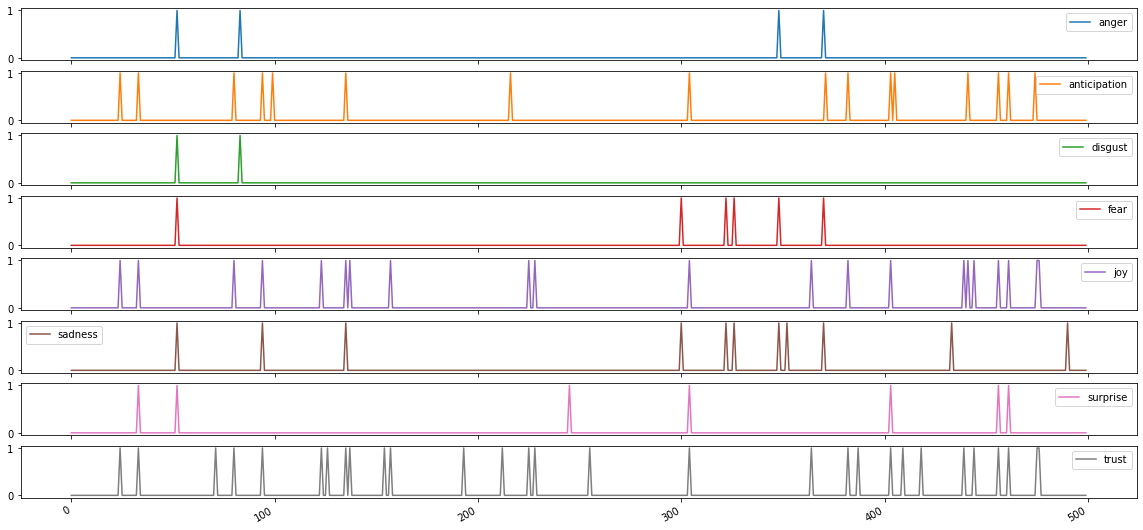

In [11]:
new_plot = new_df.drop(columns = ['word', 'negative','positive'])
x = new_plot[:500]
x.plot(subplots = True, figsize = (20, 10))